# 👋⚛️🌍Hello, Quantum World! 
## Connect to your IBM Quantum Workspace and Submit a Simple Job

In this notebook, we'll review the basics of connecting to IBM Quantum, and of submitting a simple quantum program.

### Prerequisites: install the below packages in your environment.
 * NOTE: the Qiskit 2.1.0 package is required at a minimum for authentication to the new IBM Quantum Platform on IBM Cloud. Please ensure that this version is installed to avoid technical blockers.
 * You will need to restart your kernel after updating the version of any packages.

In [ ]:
!pip install qiskit==2.1.0 qiskit[visualisation] qiskit-ibm-runtime python-dotenv matplotlib pylatexenc

In [ ]:
pip install qiskit-aer

### 1. Retrieve your API key from your IBM Cloud Account

We recommend storing your API keys in an environment variable file for security purposes.
Visit https://quantum.cloud.ibm.com/ and sign in.
You can create multiple API keys; for each, you weill have 5 minutes (300 seconds) to save your API key, after which point you will no longer be able to access your key.

In [ ]:
import os 
from dotenv import load_dotenv

NQCC_IBM_QUANTUM_API_KEY = "R6iYDy8QfPF7Jc2BXMn--QuV3XGXNg8oAZNe2V_nvlWj"
load_dotenv()
# Add your API Key as an environment variable in a .env file
API_KEY = os.getenv("NQCC_IBM_QUANTUM_API_KEY")
print(API_KEY)

None
2.1.1


In [2]:
import matplotlib
import qiskit
print(qiskit.__version__)

2.1.0


In [3]:
# Input your IBM Service details 
NQCC_IBM_QUANTUM_API_KEY = "R6iYDy8QfPF7Jc2BXMn--QuV3XGXNg8oAZNe2V_nvlWj"
ibm_instance_crn = "crn:v1:bluemix:public:quantum-computing:us-east:a/d4f95db0515b47b7ba61dba8a424f873:55736fd5-c0a0-4f44-8180-ce6e81d6c9d0::"

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
QiskitRuntimeService.save_account(
  token=NQCC_IBM_QUANTUM_API_KEY,
  channel="ibm_quantum_platform", # `channel` distinguishes between different account types.
  instance=ibm_instance_crn, # Optionally copy the instance CRN or name from the Instance section on the dashboard.
  name="NQCC-Q3", # Optionally name this set of credentials.
  overwrite=True # Only needed if you already have Cloud credentials.
)

In [7]:
# Load default saved credentials
service = QiskitRuntimeService(name="NQCC-Q3")

In [8]:
backend = service.backend('ibm_pittsburgh')

In [9]:
from qiskit_aer.noise import NoiseModel

In [10]:
noise_model = NoiseModel.from_backend(backend)

In [10]:
# For remote backend QPU

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService

# After using the following code, go to the IBM Cloud API keys page (https://cloud.ibm.com/iam/apikeys)
# and disable your API key (click Enabled slider in the API key field)
service = QiskitRuntimeService(channel="ibm_quantum_platform", token=API_KEY, instance=ibm_instance_crn)

In [13]:
backends = service.backends()

print(backends)

ibm_brisbane = service.backend('ibm_brisbane')

for item in ibm_brisbane.__dict__.items():
    print(item)

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_fez')>, <IBMBackend('ibm_torino')>, <IBMBackend('ibm_marrakesh')>, <IBMBackend('ibm_kingston')>]
('_options', Options(shots=4000, memory=False, meas_level=<MeasLevel.CLASSIFIED: 2>, meas_return=<MeasReturnType.AVERAGE: 'avg'>, memory_slots=None, memory_slot_size=100, rep_time=None, rep_delay=None, init_qubits=True, use_measure_esp=None, use_fractional_gates=False, noise_model=None, seed_simulator=None))
('_provider', None)
('name', 'ibm_brisbane')
('description', None)
('online_date', datetime.datetime(2023, 1, 23, 5, 0, tzinfo=tzutc()))
('backend_version', '1.1.142')
('_coupling_map', None)
('_instance', None)
('_service', <QiskitRuntimeService>)
('_api_client', <qiskit_ibm_runtime.api.clients.runtime.RuntimeClient object at 0x000002202E35B8B0>)
('_configuration', <qiskit_ibm_runtime.models.backend_configuration.QasmBackendConfiguration object at 0x000002202E7BFE80>)
('_properties', None)
('_defaults', Non

### 2. Create a Basic Circuit

Using Qiskit:

In [14]:
from qiskit import QuantumCircuit, transpile 
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

In [15]:
# Create a simple circuit
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.measure_all()

circuit.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

In [16]:
# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, ibm_brisbane)

# Run the transpiled circuit using the simulated fake backend
sampler = SamplerV2(mode = ibm_brisbane)
job = sampler.run([transpiled_circuit])
pub_result = job.result()[0]

counts = pub_result.data.meas.get_counts()
print(counts)

{'101': 47, '000': 1936, '111': 1972, '001': 31, '110': 10, '010': 52, '011': 30, '100': 18}


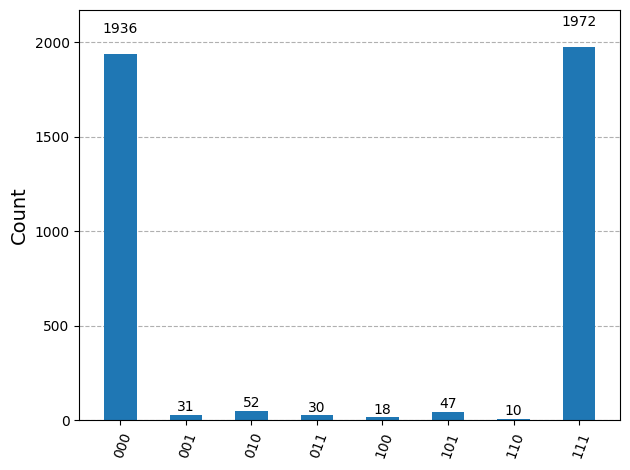

In [17]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)
